Remember that the labels that we are using are: `thumbsup`,`thumbsdown`,`thankyou`,`livelong`

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned' # Two models so far: my_ssd_mobnet and my_ssd_mobnet_tuned
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

Let's start clonning the TFOD API on `'Tensorflow/models/research/object_detection'` 

In [6]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Let's install the protocol buffer compiler, `protoc`, used to compile *.proto* files

In [7]:
!brew install protobuf
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
all-repos           copier              gitlab-ci-local     ncnn
charmcraft          git-svn             libsigrok           node@16
==> Updated Formulae
Updated 1042 formulae.
==> New Casks
blender-benchmark   gitdock             megazeux            nanosaur
bugdom              live-home-3d        mightymike          sonic3air
==> Updated Casks
Updated 106 casks.
==> Deleted Casks
silverlight                              upic

To reinstall 3.17.3, run:
  brew reinstall protobuf
Processing /Users/jaime/deep_learning/object_detection_tf/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1676567 sha256=4416b863f6f65de75dd68c2c5d02430d2e70988938787008e9037978be505a07
  Stored in directory: /private/var/folders/vt/jwjttr2x1r34_v5z9t89stwc0000gn/T/pip-ephem-wheel-cache-oivt5oua/wheels/ab/69/3d/3bd6773c1997570a7ae1f42fa46b75d20f8179c15d65b9ce36
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.9: /Users/jaime/deep_learning/object_detection_tf/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-25 20:32:25.342139: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jaime/deep_learning/object_detection_tf/tfod/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W1025 20:32:25.703290 4397993472 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.67s
I1025 20:32:25.9

I1025 20:32:31.163546 4397993472 efficientnet_model.py:147] round_filter input=40 output=40
I1025 20:32:31.163691 4397993472 efficientnet_model.py:147] round_filter input=80 output=80
I1025 20:32:31.409694 4397993472 efficientnet_model.py:147] round_filter input=80 output=80
I1025 20:32:31.409856 4397993472 efficientnet_model.py:147] round_filter input=112 output=112
I1025 20:32:31.748807 4397993472 efficientnet_model.py:147] round_filter input=112 output=112
I1025 20:32:31.749284 4397993472 efficientnet_model.py:147] round_filter input=192 output=192
I1025 20:32:32.524706 4397993472 efficientnet_model.py:147] round_filter input=192 output=192
I1025 20:32:32.524873 4397993472 efficientnet_model.py:147] round_filter input=320 output=320
I1025 20:32:32.618664 4397993472 efficientnet_model.py:147] round_filter input=1280 output=1280
I1025 20:32:32.665080 4397993472 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.0, depth_coefficient=1.0, 

I1025 20:32:37.213078 4397993472 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=80, output_filters=112, kernel_size=5, num_repeat=

I1025 20:32:43.534935 4397993472 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b5
I1025 20:32:43.535086 4397993472 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 288
I1025 20:32:43.535153 4397993472 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 7
I1025 20:32:43.537229 4397993472 efficientnet_model.py:147] round_filter input=32 output=48
I1025 20:32:43.553133 4397993472 efficientnet_model.py:147] round_filter input=32 output=48
I1025 20:32:43.553271 4397993472 efficientnet_model.py:147] round_filter input=16 output=24
I1025 20:32:43.744162 4397993472 efficientnet_model.py:147] round_filter input=16 output=24
I1025 20:32:43.744308 4397993472 efficientnet_model.py:147] round_filter input=24 output=40
I1025 20:32:44.193542 4397993472 efficientnet_model.py:147] round_filter input=24 output=40
I1025 20:32:44.193699 4397993472 efficientnet_model.py:147] round_fil

I1025 20:32:56.301208 4397993472 efficientnet_model.py:147] round_filter input=24 output=48
I1025 20:32:56.301373 4397993472 efficientnet_model.py:147] round_filter input=40 output=80
I1025 20:32:58.092152 4397993472 efficientnet_model.py:147] round_filter input=40 output=80
I1025 20:32:58.092346 4397993472 efficientnet_model.py:147] round_filter input=80 output=160
I1025 20:32:59.811299 4397993472 efficientnet_model.py:147] round_filter input=80 output=160
I1025 20:32:59.811444 4397993472 efficientnet_model.py:147] round_filter input=112 output=224
I1025 20:33:01.036995 4397993472 efficientnet_model.py:147] round_filter input=112 output=224
I1025 20:33:01.037143 4397993472 efficientnet_model.py:147] round_filter input=192 output=384
I1025 20:33:03.446593 4397993472 efficientnet_model.py:147] round_filter input=192 output=384
I1025 20:33:03.446753 4397993472 efficientnet_model.py:147] round_filter input=320 output=640
I1025 20:33:04.423674 4397993472 efficientnet_model.py:147] round_fi

In [9]:
!pip list

Package                       Version
----------------------------- ----------
absl-py                       0.12.0
apache-beam                   2.33.0
appnope                       0.1.2
argon2-cffi                   21.1.0
astunparse                    1.6.3
attrs                         21.2.0
avro-python3                  1.9.2.1
backcall                      0.2.0
bleach                        4.1.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.7
clang                         5.0
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.10.0
Cython                        0.29.24
debugpy                       1.5.1
decorator                     5.1.0
defusedxml                    0.7.1
dill                          0.3.1.1
dm-tree                       0.1.6
docopt                        0.6.2
entrypoi

In [10]:
import object_detection

In [11]:
!brew install wget

To reinstall 1.21.2, run:
  brew reinstall wget


`tar -zxvf`
- `z` means (un)z̲ip.
- `x` means ex̲tract files from the archive.
- `v` means print the filenames v̲erbosely.
- `f` means the following argument is a f̱ilename.

In [12]:
if os.name == 'posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-10-25 20:33:12--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolviendo download.tensorflow.org (download.tensorflow.org)... 142.250.200.112
Conectando con download.tensorflow.org (download.tensorflow.org)[142.250.200.112]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 20515344 (20M) [application/x-tar]
Grabando a: «ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz»

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  6,36MB/s    en 3,1s    

2021-10-25 20:33:16 (6,36 MB/s) - «ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz» guardado [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_t

# 2. Create Label Map

In [14]:
labels = [{'name':'ThumbsUp', 'id':1},
          {'name':'ThumbsDown', 'id':2},
          {'name':'ThankYou', 'id':3},
          {'name':'LiveLong', 'id':4}]

In [15]:
files['LABELMAP']

'Tensorflow/workspace/annotations/label_map.pbtxt'

In [16]:
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

Eventually we're getting a file `label_map.pbtxt` like this one:

    item {
        name:'tongueout'
        id:1
    }
    item { 
        name:'wink'
        id:2
    }
    item { 
        name:'smile'
        id:3
    }
    item { 
        name:'surprise'
        id:4
    }

# 3. Create TF records

`TFRecords` is a binary format to storing data. It helps to speed up training.

In [17]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [18]:
files['TF_RECORD_SCRIPT']

'Tensorflow/scripts/generate_tfrecord.py'

    usage: generate_tfrecord.py [-h] [-x XML_DIR] [-l LABELS_PATH] [-o OUTPUT_PATH] [-i IMAGE_DIR] [-c CSV_PATH]

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [21]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [2]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [23]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [24]:
files['PIPELINE_CONFIG']

'Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config'

In [25]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [26]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [27]:
pipeline_config

model {
  ssd {
    num_classes: 90
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0


Let's change some hyperparameters like the number of classes `num_classes`

In [28]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [29]:
pipeline_config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

In [30]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

# 6. Train the model

In order to train the model we need:
1. Script
2. Model directory (where config.py is) it has all the custom paths, labels
3. Pipeline config
4. Number of training steps

In [31]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [32]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000"\
.format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'])

In [33]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [34]:
!{command}

2021-10-25 20:43:56.452179: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1025 20:43:56.455559 4654149120 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I1025 20:43:56.503000 4654149120 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I1025 20:43:56.529957 4654149120 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1025 20:43:56.530243 4654149120 config_util.py:552] Maybe overwriting use_b

INFO:tensorflow:Step 200 per-step time 2.407s
I1025 20:52:40.308938 4654149120 model_lib_v2.py:698] Step 200 per-step time 2.407s
INFO:tensorflow:{'Loss/classification_loss': 0.19767632,
 'Loss/localization_loss': 0.19235204,
 'Loss/regularization_loss': 0.15490544,
 'Loss/total_loss': 0.5449338,
 'learning_rate': 0.0373328}
I1025 20:52:40.309406 4654149120 model_lib_v2.py:701] {'Loss/classification_loss': 0.19767632,
 'Loss/localization_loss': 0.19235204,
 'Loss/regularization_loss': 0.15490544,
 'Loss/total_loss': 0.5449338,
 'learning_rate': 0.0373328}
INFO:tensorflow:Step 300 per-step time 1.841s
I1025 20:55:44.427319 4654149120 model_lib_v2.py:698] Step 300 per-step time 1.841s
INFO:tensorflow:{'Loss/classification_loss': 0.118896455,
 'Loss/localization_loss': 0.048537876,
 'Loss/regularization_loss': 0.1546779,
 'Loss/total_loss': 0.32211223,
 'learning_rate': 0.0426662}
I1025 20:55:44.429828 4654149120 model_lib_v2.py:701] {'Loss/classification_loss': 0.118896455,
 'Loss/locali

INFO:tensorflow:Step 1700 per-step time 37.866s
I1025 23:07:10.401153 4654149120 model_lib_v2.py:698] Step 1700 per-step time 37.866s
INFO:tensorflow:{'Loss/classification_loss': 0.05663005,
 'Loss/localization_loss': 0.041349504,
 'Loss/regularization_loss': 0.1465984,
 'Loss/total_loss': 0.24457794,
 'learning_rate': 0.07995972}
I1025 23:07:10.403477 4654149120 model_lib_v2.py:701] {'Loss/classification_loss': 0.05663005,
 'Loss/localization_loss': 0.041349504,
 'Loss/regularization_loss': 0.1465984,
 'Loss/total_loss': 0.24457794,
 'learning_rate': 0.07995972}
INFO:tensorflow:Step 1800 per-step time 72.341s
I1026 01:07:44.574783 4654149120 model_lib_v2.py:698] Step 1800 per-step time 72.341s
INFO:tensorflow:{'Loss/classification_loss': 0.093109794,
 'Loss/localization_loss': 0.026604626,
 'Loss/regularization_loss': 0.14585379,
 'Loss/total_loss': 0.2655682,
 'learning_rate': 0.0799474}
I1026 01:07:44.582581 4654149120 model_lib_v2.py:701] {'Loss/classification_loss': 0.093109794,
 

# 7. Evaluate the model

In [36]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [37]:
!{command}

W1026 11:04:33.289215 4705017344 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1026 11:04:33.289445 4705017344 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1026 11:04:33.289521 4705017344 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1026 11:04:33.289594 4705017344 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1026 11:04:33.290512 4705017344 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-10-26 11:04:33.304276: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical 

INFO:tensorflow:Performing evaluation on 4 images.
I1026 11:05:10.732721 4705017344 coco_evaluation.py:293] Performing evaluation on 4 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I1026 11:05:10.732975 4705017344 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I1026 11:05:10.733324 4705017344 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.575
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.500
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Ave

# 8. Load Train Model From Checkpoint

In [5]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [6]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2021-10-27 11:17:05.498518: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Detect from Image

In [7]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [13]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thumbsdown.44d93f20-35be-11ec-b8d7-acbc32cb08df.jpg')

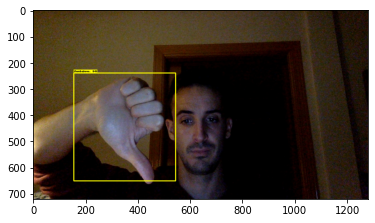

In [19]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real time detections from webcam

In [20]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Freezing the graph

In [21]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [22]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [23]:
!{command}

2021-10-27 11:39:17.704026: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1027 11:39:17.979105 4425408000 deprecation.py:611] From /Users/jaime/deep_learning/object_detection_tf/tfod/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of

2021-10-27 11:39:52.401541: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W1027 11:40:14.994629 4425408000 save.py:249] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I1027 11:40:20.490490 4425408000 builder_impl.py:780] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export

# Convert to TFJS

Export to TFJS. It will create a model.json file and the number of bin folders

In [24]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 982 kB/s            
You should consider upgrading via the '/Users/jaime/deep_learning/object_detection_tf/tfod/bin/python -m pip install --upgrade pip' command.


In [25]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [26]:
!{command}

2021-10-27 11:48:19.376141: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-27 11:48:33.700327: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-10-27 11:48:33.700510: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-10-27 11:48:34.168574: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3843 nodes (3433), 5137 edges (4720), time = 247.957ms.
  function_optimizer: function_optimizer did nothing. time = 14.251ms.

2021-10-27 11:48:39.253610: I 

# Convert to TFLite

In [27]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [28]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [29]:
!{command}

2021-10-27 12:43:23.268034: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1027 12:43:36.471282 4766813696 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x158c30af0>, because it is not built.
W1027 12:43:36.749962 4766813696 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x158c957c0>, because it is not built.
W1027 12:43:36.750140 4766813696 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x159610850>, because it is not built.
W1027 12:43:36.750233 4766813696 save_impl.py:71] Skipping ful

2021-10-27 12:43:48.370123: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W1027 12:44:10.824883 4766813696 save.py:249] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets
I1027 12:44:16.985913 4766813696 builder_impl.py:780] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets
